# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$.

In [ ]:
def newton_iteration(f, Df, x0, epsilon=1e-5, maxiter=1000):
  xn=x0
  for n in range(0,maxiter):
    print("n",n,"xn",xn)
    fxn=f(xn)
    if abs(fxn)<epsilon:
      print('Solución después de',n,'iteraciones')
      return xn
    Dfxn=Df(xn)
    if Dfxn==0:
      print('La derivada es igual a 0, no hay solución.')
      return none
    xn=xn-(fxn/Dfxn)
  print('Se excedió el número máximo de iteraciones')
  return None

### Test I.1

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [ ]:
f=lambda x: x**2-1
Df=lambda x: 2*x
newton_iteration(f,Df,x0=27,maxiter=200,epsilon=1e-5)

n 0 xn 27
n 1 xn 13.518518518518519
n 2 xn 6.7962455606291226
n 3 xn 3.4716928118179133
n 4 xn 1.8798683649653458
n 5 xn 1.2059102525726746
n 6 xn 1.0175796797581285
n 7 xn 1.0001518530423443
n 8 xn 1.0000000115279226
Solución después de 8 iteraciones


1.0000000115279226

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [ ]:
def newton_iteration_mod(f, Df, x0,m, epsilon=1e-5, maxiter=1000):
  xn=x0
  for n in range(0,maxiter):
    print("n:",n,"xn:",xn,"Parámetro m:",m)
    fxn=f(xn)
    if abs(fxn)<epsilon:
      print('Solución después de',n,'iteraciones')
      return xn
    Dfxn=Df(xn)
    if Dfxn==0:
      print('La derivada es igual a 0, no hay solución.')
      return none
    xn=xn-m*(fxn/Dfxn)
  print('Se excedió el número máximo de iteraciones')
  return None

In [ ]:
f=lambda x: (x**2-1)**2
Df=lambda x: 4*x*(x**2-1)
newton_iteration_mod(f,Df,x0=3,m=1,epsilon=1e-5,maxiter=1000)

n: 0 xn: 3 Parámetro m: 1
n: 1 xn: 2.3333333333333335 Parámetro m: 1
n: 2 xn: 1.8571428571428572 Parámetro m: 1
n: 3 xn: 1.5274725274725276 Parámetro m: 1
n: 4 xn: 1.309273460352597 Parámetro m: 1
n: 5 xn: 1.172900690337209 Parámetro m: 1
n: 6 xn: 1.0928222931445428 Parámetro m: 1
n: 7 xn: 1.0483821848093802 Parámetro m: 1
n: 8 xn: 1.0247492943278167 Parámetro m: 1
n: 9 xn: 1.0125240806822127 Parámetro m: 1
n: 10 xn: 1.0063007684563006 Parámetro m: 1
n: 11 xn: 1.0031602470058565 Parámetro m: 1
n: 12 xn: 1.001582612427596 Parámetro m: 1
n: 13 xn: 1.0007919313899105 Parámetro m: 1
Solución después de 13 iteraciones


1.0007919313899105

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [64]:
def f_p_sol(eps = 1e-5, alpha = 1):

    prev = 1.5/2
    cur = prev - alpha*(np.sqrt(prev) - np.cos(prev))
    eps1 = abs(cur - prev)*10
    num = 1

    while abs(cur - prev)>0.25*eps and cur>0:
        prev = cur
        cur = cur - alpha*(np.sqrt(cur) - np.cos(cur))
        num+=1

    return cur, num
list1=[1,2,3,4,5,6,10,40]

for i in list1:
  print(f_p_sol(eps=1e-5,alpha=i))

(0.6417142154160496, 9)
(-0.11760568315221742, 5)
(-1.643018936201507, 3)
(-6.357974600710566, 3)
(-10.240483280461454, 3)
(-0.0560192094637062, 1)
(-0.593365349106177, 1)
(-4.623461396424708, 1)


# Part III. Newton's fractal.

(Not graded).

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points.
Color the grid in three colors, according to the root, to which iterations converged.

In [ ]:
import cmath

def newton_fractal(x0):

    for _ in range(1000):
        fx = x0**3 - 1
        fpx = 3 * x0**2

        if abs(fpx) < 1e-5:
            return None
        nx = x0 - fx / fpx

        if abs(nx - x0) <= 1e-5:
            break

        x0 = nx

    roots = [cmath.exp(complex(0, 2 * np.pi * k / 3)) for k in range(3)]
    distances = [abs(root - nx) for root in roots]
    closest_root = min(range(3), key=lambda i: distances[i])

    return closest_root + 1


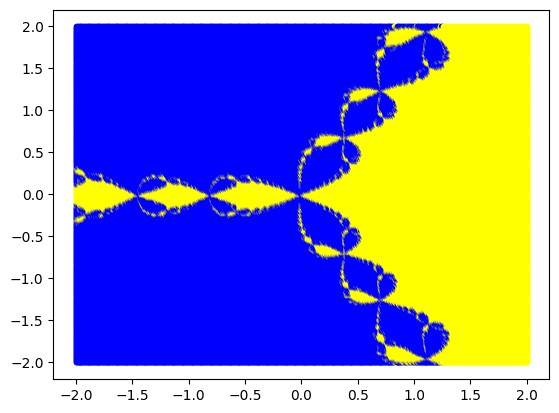

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)

for x0 in x:
    for y0 in y:
        fr = newton_fractal(complex(x0,y0))
        if fr==1:
            plt.plot(x0, y0, marker='o', markersize=3, color='yellow')
        elif fr==2:
            plt.plot(x0, y0, marker='o', markersize=3, color='blue')

roots_x = []
roots_y = []
for i in range(3):
    z = cmath.exp(complex(0,2*np.pi*i/3))
    roots_x.append(z.real)
    roots_y.append(z.imag)

plt.scatter(roots_x, roots_y, c='g')
plt.show()